In [2]:
import os
#import iris
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [10]:
R_earth = 6367.47 #km
dphi = 0.25*np.pi/180. #radians, this is also dlambda

In [ ]:
ds_grib = xr.load_dataset(
    '/project2/geos39650/jet_stream/reanalysis_getter/cdsapi_requested_files/reanalysis_era5_request_167.128_2007-01-01 00:00:00.grib', 
    engine='cfgrib')  #this is the every 12 hours dataset (every 3 hours caused a memory error)

In [ ]:
index = pd.MultiIndex.from_arrays(
    [ds_grib.longitude.values, 
     ds_grib.latitude.values], 
    names=['lon', 'lat']
)
ds_grib['values'] = index
ds_grib_reshaped = ds_grib.unstack('values')
ds_grib_reshaped

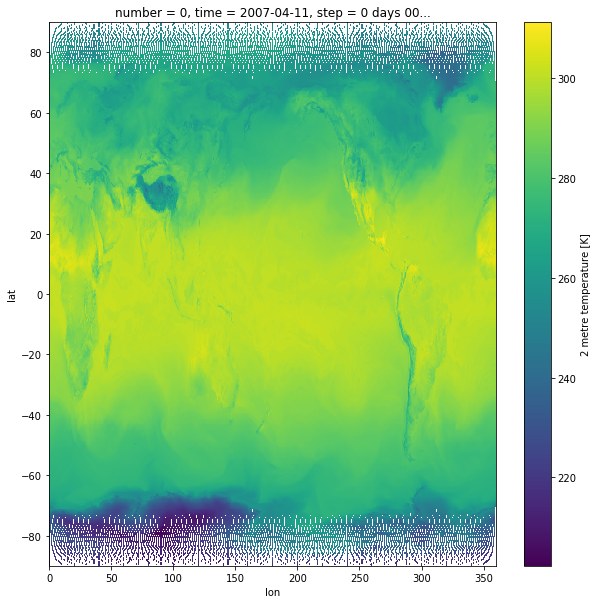

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))
air = ds_grib_reshaped.t2m.T
air.isel(time=200).plot()

In [ ]:
air_week = air.resample(time='1W').mean()
air_week_df = air_week.to_dataframe()
air_week_df = air_week_df.reset_index(drop=False).filter(['lat', 'lon', 'time', 't2m'])

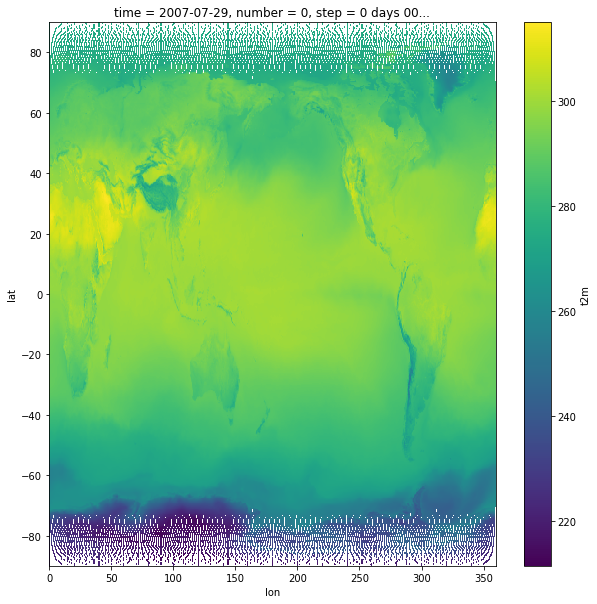

In [6]:
fig, ax = plt.subplots(figsize = (10, 10))
air_week.isel(time=29).plot() #not sure if isel and time=200 will work now

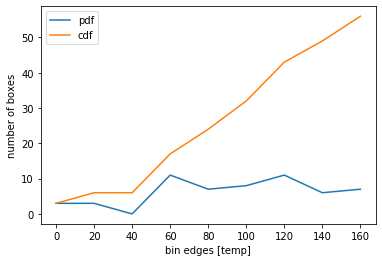

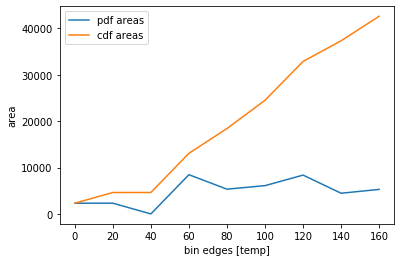

In [41]:
Tmin = 0 #min(air_week_df.t2m)
Tmax = 200 #max(air_week_df.t2m) #kelvin
Tbins = range(Tmin,Tmax,20)

#Temp = air_week_df['t2m']
Temp = np.linspace(Tmin,Tmax,num=100)
Temp += np.random.normal(loc=50,scale=50, size=100)


#number of boxes at each temp
pdf_boxes = np.histogram(Temp,bins=Tbins)
plt.plot(pdf_boxes[1][:-1],pdf_boxes[0],label='pdf')
#number of boxes below each temp
# cdf = plt.hist(Temp,bins=Tbins,cumulative=True)
cdf_boxes=np.cumsum(pdf_boxes[0])
plt.plot(pdf_boxes[1][:-1],cdf_boxes,label='cdf')
plt.legend()
plt.xlabel('bin edges [temp]')
plt.ylabel('number of boxes')
plt.show()

#area 
#weight entry by box area so that y axis is no longer the number of boxes, but rather the area taken up by each box
lat = np.linspace(np.pi/2.,np.pi/2.*(1-1/4.),num=100)
areas = (R_earth*dphi)**2 * np.sin(lat)
weighted_T = Temp*areas
pdf_areas = np.histogram(Temp,bins=Tbins,weights=areas)
cdf_areas=np.cumsum(pdf_areas[0])
plt.plot(pdf_areas[1][:-1],pdf_areas[0],label='pdf areas')
plt.plot(pdf_areas[1][:-1],cdf_areas,label='cdf areas')
plt.xlabel('bin edges [temp]')
plt.ylabel('area')
plt.legend()
plt.show()

1.1780972450961724


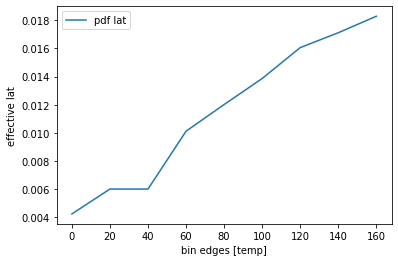

In [42]:
#convert area to effective latitude
#A = 2piR^2 (1-sin(lat_eff))
#so 1-A/(2piR^2) = sin(lat_eff)
#but remember latitude is defined to start at pi at the north pole
pdf_lat_effs = np.pi/2.-np.arcsin(1-cdf_areas / (2*np.pi*R_earth**2) )
cdf_lat_effs = np.cumsum(pdf_lat_effs)
plt.plot(pdf_areas[1][:-1],pdf_lat_effs,label='pdf lat')
#plt.plot(pdf_areas[1][:-1],cdf_lat_effs,label='cdf lat')
print(np.pi/2.-np.pi/8)
plt.xlabel('bin edges [temp]')
plt.ylabel('effective lat')
plt.legend()
plt.show()

In [ ]:
plt.plot(lat,)